Product popularity based recommendation system - A recommendation system uses to recommend the popular products sold in that particular business website to new customers

In [1]:
# importing neccesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# loading the dataset
product_ratings = pd.read_csv('ratings_Beauty.csv')
# removing missing or NaN values
product_ratings = product_ratings.dropna()
product_ratings.head(5)

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [3]:
product_ratings.shape

(2023070, 4)

In [4]:
# grouping the productid and adding the count as ratings(occurance of a product) for each product
products = pd.DataFrame(product_ratings.groupby('ProductId')['Rating'].count())
popular_products = products.sort_values('Rating', ascending=False)
popular_products.head(10)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838


<Axes: xlabel='ProductId'>

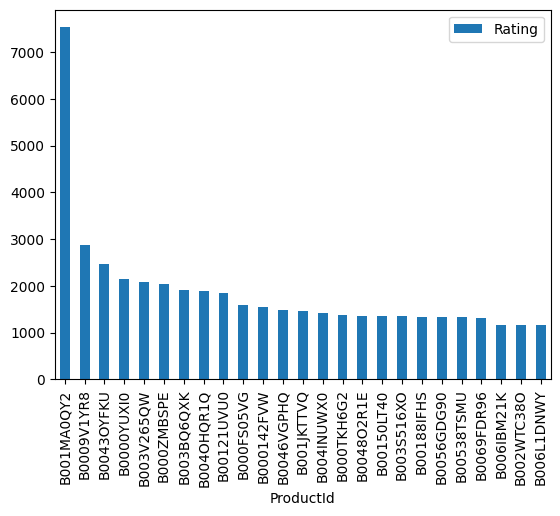

In [5]:
#plotting the top 25 popular products
popular_products.head(25).plot(kind = "bar")

Model-based collaborative filtering system - 
Recommend items to users by analyzing their purchase history and identifying items with similar ratings from other users who have purchased similar items.

In [6]:
import sklearn
from sklearn.decomposition import TruncatedSVD

In [7]:
ratings = product_ratings.head(10000)

In [8]:
# creating a utility matrix (user-item matrix)
utility_matrix = ratings.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
utility_matrix.head(5)

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A024581134CV80ZBLIZTZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A03056581JJIOL5FSKJY7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A03099101ZRK4K607JVHH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0505229A7NSH3FRXRR4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
utility_matrix.shape

(9697, 886)

In [10]:
# transposing the utility matrix
ratings1 = utility_matrix.T
ratings1.head(5)

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0558925278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0733001998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0737104473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0762451459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
ratings1.shape

(886, 9697)

In [12]:
X = ratings1
# using svd dimensionality reduction technique to reduce the above matrix into 10 components (to identify similiar user & patterns)
SVD = TruncatedSVD(n_components=10)
reduced_matrix = SVD.fit_transform(X)
reduced_matrix.shape

(886, 10)

In [16]:
# correlarion matrix 
correlation_matrix = np.corrcoef(reduced_matrix)
correlation_matrix.shape

(886, 886)

In [19]:
X.index[35] # randomly taking a product

'1304622452'

In [20]:
# consider the i item is purchased by a customer
i = "1304622452"
products = list(X.index)
product_ID = products.index(i)
product_ID

35

In [21]:
# correlation between all items and the item purchased by the customer, based on ratings given by other customers who bought the same product.
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(886,)

In [22]:
# only recommending top 10 items having high correlation with purchased item in order
Recommended_products = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by that customer
Recommended_products.remove(i) 
Recommended_products[0:9]

['1304139212',
 '130414643X',
 '1304174867',
 '1304174905',
 '1304511111',
 '1304511154',
 '1304622657',
 '1304622665',
 '1304624498']